In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import numpy as np

In [2]:
df_airline = pd.read_csv('Airline Satisfaction.csv')

In [3]:
df_airline

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,25971,78463,Male,disloyal Customer,34,Business travel,Business,526,3,3,...,4,3,2,4,4,5,4,0,0.0,neutral or dissatisfied
129876,25972,71167,Male,Loyal Customer,23,Business travel,Business,646,4,4,...,4,4,5,5,5,5,4,0,0.0,satisfied
129877,25973,37675,Female,Loyal Customer,17,Personal Travel,Eco,828,2,5,...,2,4,3,4,5,4,2,0,0.0,neutral or dissatisfied
129878,25974,90086,Male,Loyal Customer,14,Business travel,Business,1127,3,3,...,4,3,2,5,4,5,4,0,0.0,satisfied


In [4]:
df_airline.columns

Index(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

## Data Manipulation 

In [5]:
df_airline.drop(['Unnamed: 0'], axis =1, inplace=True)

In [6]:
df_airline.isnull().sum()

id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
satisfaction                           0
dtype: int64

In [7]:
df_airline = df_airline.dropna(subset =['Arrival Delay in Minutes']).copy()

In [8]:
rating_columns = ['Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink', 
                  'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Checkin service', 
                  'Inflight service', 'Cleanliness']

In [9]:
for col in rating_columns:
    mode = df_airline[col].mode()[0]
    #df_airline[col]= df_airline[col].replace(0, mode)
    df_airline.loc[df_airline[col] == 0, col] = mode

In [10]:
df_airline

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,78463,Male,disloyal Customer,34,Business travel,Business,526,3,3,3,...,4,3,2,4,4,5,4,0,0.0,neutral or dissatisfied
129876,71167,Male,Loyal Customer,23,Business travel,Business,646,4,4,4,...,4,4,5,5,5,5,4,0,0.0,satisfied
129877,37675,Female,Loyal Customer,17,Personal Travel,Eco,828,2,5,1,...,2,4,3,4,5,4,2,0,0.0,neutral or dissatisfied
129878,90086,Male,Loyal Customer,14,Business travel,Business,1127,3,3,3,...,4,3,2,5,4,5,4,0,0.0,satisfied


## Visualization

## Q1. Which gender is more and less satisfied with the airline service?

satisfaction,neutral or dissatisfied,satisfied
Gender,,
Female,37524,28179
Male,35701,28083


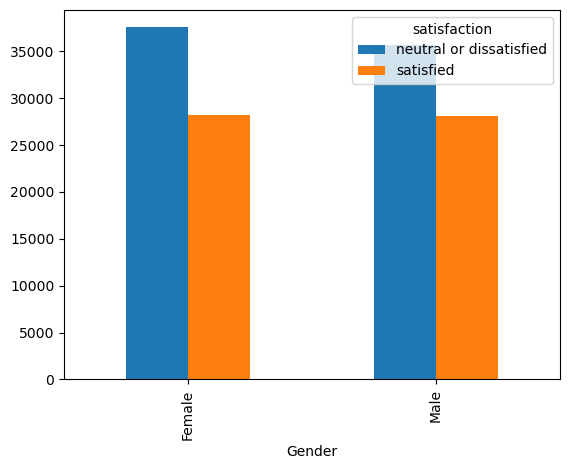

In [11]:
Gender_vs_Satisfaction = df_airline.groupby(['Gender','satisfaction']).size().reset_index().pivot(index= 'Gender', columns= 'satisfaction', values = 0)
Gender_vs_Satisfaction.plot(kind = 'bar')
Gender_vs_Satisfaction

satisfaction,neutral or dissatisfied,satisfied
Gender,,
Female,57.111547,42.888453
Male,55.971717,44.028283


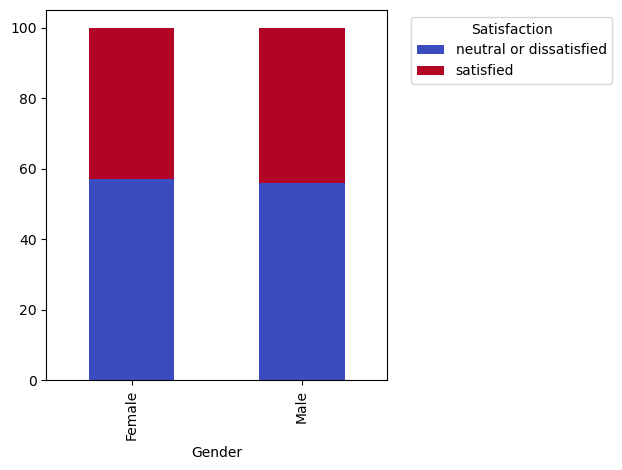

In [12]:
Gender_vs_Satisfaction_percent = Gender_vs_Satisfaction.div(Gender_vs_Satisfaction.sum(axis=1), axis=0) * 100
ax = Gender_vs_Satisfaction_percent.plot(kind='bar', stacked=True, colormap='coolwarm')
ax.legend(title='Satisfaction', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
Gender_vs_Satisfaction_percent

Inference: There is a small, insignificant difference bw the number and percent (2%) of men and women dissatisfied with the Airline services. Thus we can say the satisfaction is not gender based.

## Q2. Number/percent of people satisfied/dissatisfied when Arrival/Departure was delayed

In [13]:
on_time = df_airline[df_airline['Arrival Delay in Minutes']==0]
delayed = df_airline[df_airline['Arrival Delay in Minutes']>0]

In [14]:
on_time_counts = on_time['satisfaction'].value_counts()
delayed_counts = delayed['satisfaction'].value_counts()
on_time_counts

satisfaction
neutral or dissatisfied    38263
satisfied                  34490
Name: count, dtype: int64

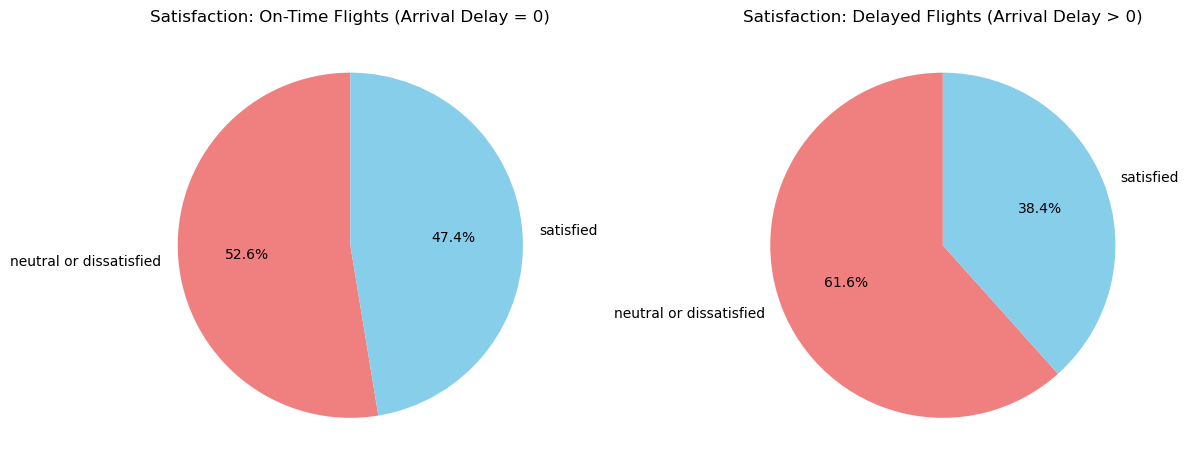

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].pie(on_time_counts, labels=on_time_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'skyblue'])
axes[0].set_title('Satisfaction: On-Time Flights (Arrival Delay = 0)')

axes[1].pie(delayed_counts, labels=delayed_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'skyblue'])
axes[1].set_title('Satisfaction: Delayed Flights (Arrival Delay > 0)')

plt.tight_layout()
plt.show()

Inference: Clearly we can see 9% of passengers were more dissatisfied with the Airline services when the arrival of the flight was delayed.

In [16]:
on_time_dep = df_airline[df_airline['Departure Delay in Minutes'] ==0]
delayed_dep = df_airline[df_airline['Departure Delay in Minutes']>0]
on_time_dep_counts = on_time_dep['satisfaction'].value_counts()
delayed_dep_counts = delayed_dep['satisfaction'].value_counts()

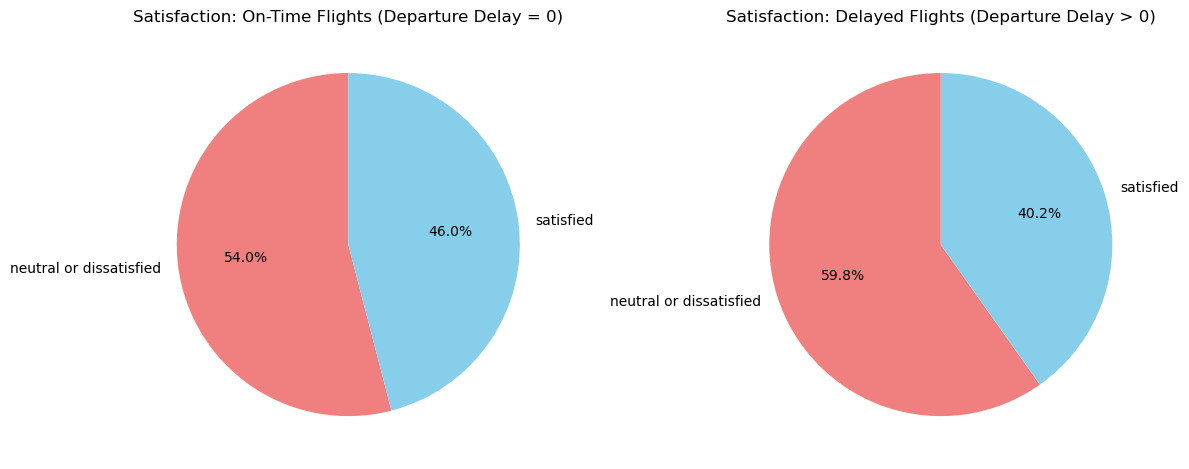

In [17]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].pie(on_time_dep_counts, labels=on_time_dep_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'skyblue'])
axes[0].set_title('Satisfaction: On-Time Flights (Departure Delay = 0)')

axes[1].pie(delayed_dep_counts, labels=delayed_dep_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'skyblue'])
axes[1].set_title('Satisfaction: Delayed Flights (Departure Delay > 0)')

plt.tight_layout()
plt.show()

Inference: Only 5.7% more customers were dissatisfied with the Airline services when the departure of the flight was delayed.

## Q3. Percentage of people satisfied/dissatisfied in different class/customer type/type of travel.

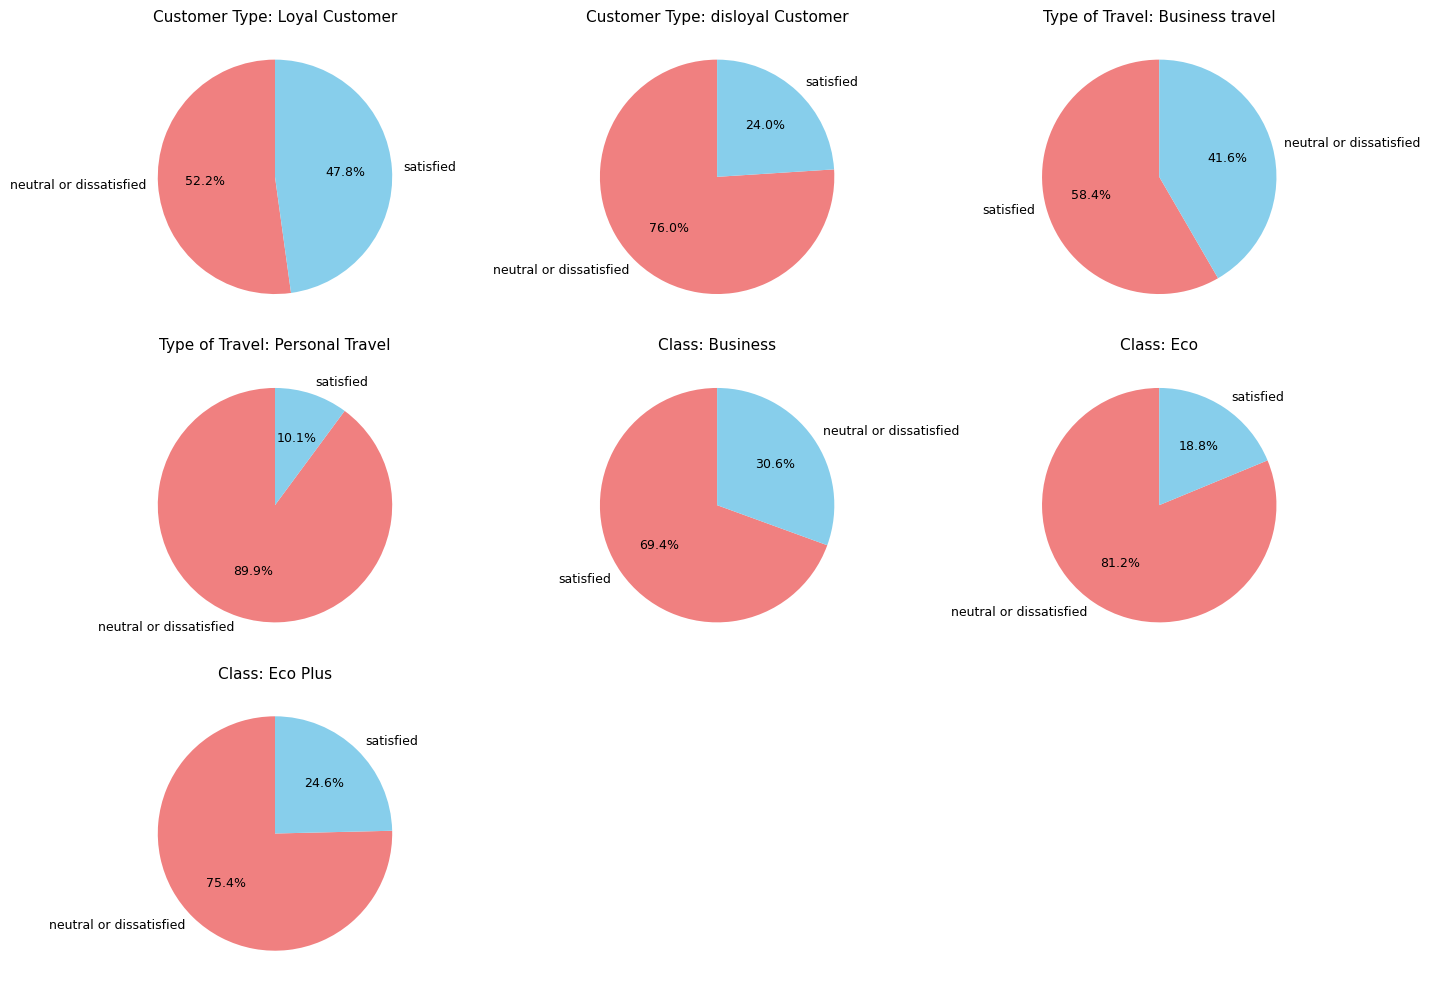

In [18]:
import matplotlib.pyplot as plt

# Define groups and categories for each row
groups = {
    'Customer Type': ['Loyal Customer', 'disloyal Customer'],
    'Type of Travel': ['Business travel', 'Personal Travel'],
    'Class': ['Business', 'Eco', 'Eco Plus']
}

# Create a figure
fig, axes = plt.subplots(3, 3, figsize=(14, 10))
axes = axes.flatten()

plot_num = 0

for col, categories in groups.items():
    for cat in categories:
        ax = axes[plot_num]
        
        # Filter data for this subgroup
        data = df_airline[df_airline[col] == cat]['satisfaction'].value_counts()
        
        # Plot pie chart
        ax.pie(
            data,
            labels=data.index,
            autopct='%1.1f%%',
            startangle=90,
            colors=['lightcoral', 'skyblue'],
            textprops={'fontsize': 9}
        )
        ax.set_title(f'{col}: {cat}', fontsize=11)
        plot_num += 1

# Hide the 2 unused plots (since we only have 7)
for i in range(plot_num, len(axes)):
    fig.delaxes(axes[i])

# Adjust layout neatly
plt.tight_layout()
plt.show()


Inference (Customer Type): While loyal customers had almost equally satisfied and dissatisfied, Almost 76% of disloyal customers were unhappy with the airlines.
Note: Disloyal Customer only account for around 20% of all customers.

Inference (Type of Travel): While 58.4% of business travellers were satisfied with Airline, suprisingly only 10% of Personal travellers were satisfied. (reason for this in the coming cells)
Note: Personal Travelller account for 31% of dataset.

Inference (Class): Most of the passenger seated in business class were satisfied but on the other hand, most of the passengers seated in Eco class were not.
Although, business and eco account for almost same number of passengers. (Reason for difference in coming cells)

## Q4. Age distribution of the travellers

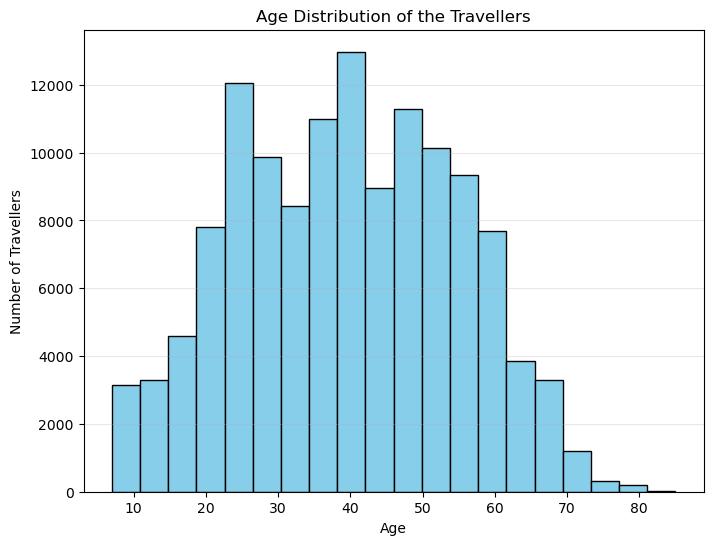

In [19]:
plt.figure(figsize=(8,6))
plt.hist(df_airline['Age'], bins=20, color='skyblue', edgecolor='black')
plt.title('Age Distribution of the Travellers')
plt.xlabel('Age')
plt.ylabel('Number of Travellers')
plt.grid(axis='y', alpha=0.3)
plt.show()

Inference: Maximum number of passengers were from 25-55 age range.

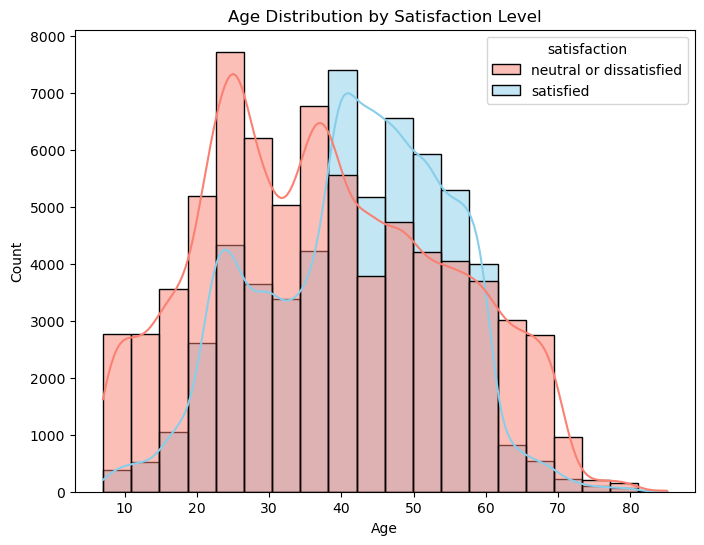

In [20]:
plt.figure(figsize=(8,6))
sns.histplot(data=df_airline, x='Age', hue='satisfaction', bins=20, kde=True,
             palette={'satisfied': 'skyblue', 'neutral or dissatisfied': 'salmon'},
             alpha=0.5)
plt.title('Age Distribution by Satisfaction Level')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

Inference: Majority of younger and older passengers are seen to have neutral or dissatisfaction review. More number of passengers in 40-60 age group were satisfied with the Airlines

## Q5. Age vs Gate Location/Inflight Entertainment/Inflight wifi service?

In [21]:
age_mean = df_airline['Age'].mean()

In [22]:
df_airline['Age_Group'] = df_airline['Age'].apply(lambda x: 'Younger' if x < age_mean else 'Older')

In [23]:
# Convert satisfaction to numeric (1 = satisfied, 0 = not satisfied)
df_airline['satisfaction_num'] = df_airline['satisfaction'].apply(lambda x: 1 if x == 'satisfied' else 0)

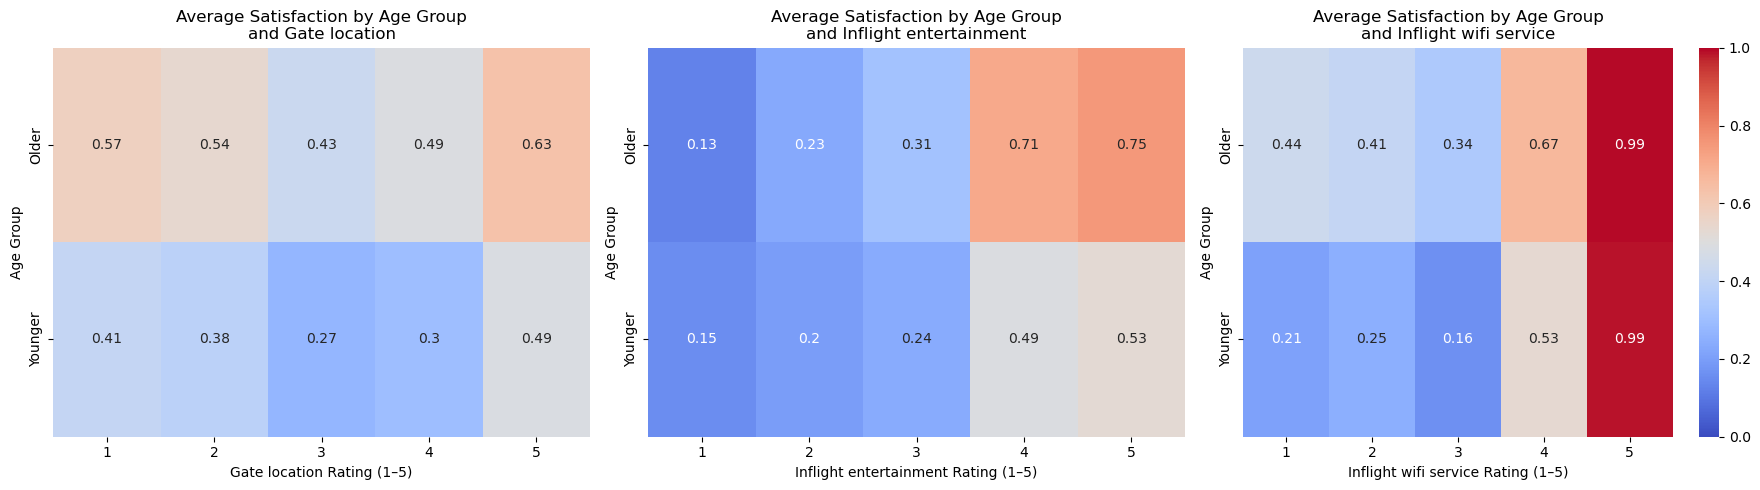

In [24]:
# Columns you want to analyze
columns_to_plot = ['Gate location', 'Inflight entertainment', 'Inflight wifi service']

# Create a figure with 3 subplots (one for each heatmap)
plt.figure(figsize=(18, 5))

for i, col in enumerate(columns_to_plot, 1):
    plt.subplot(1, 3, i)
    
    # Create pivot table for each column
    pivot_data = df_airline.pivot_table(
        index='Age_Group',
        columns=col,
        values='satisfaction_num',
        aggfunc='mean'
    )
    
    # Plot heatmap
    sns.heatmap(
        pivot_data,
        annot=True,
        cmap='coolwarm',
        center=0.5,
        vmin=0, vmax=1,      # keeps color scale consistent
        cbar=(i == 3)        # show color bar only on the last plot
    )
    
    # Titles and labels
    plt.title(f'Average Satisfaction by Age Group\nand {col}', fontsize=12)
    plt.xlabel(f'{col} Rating (1–5)')
    plt.ylabel('Age Group')

plt.tight_layout()
plt.show()
# A value of 0.63 means 63% of passengers in that group were satisfied.

Inference (Gate Location): Even with a bad rating to the Gate Location by older people (age > 40), they were more satisfied with the Airline as compared to younger passengers. 
This could indicate younger passengers were less tolerant of inconvenient gates (farther or harder to reach)
For both age groups, the satisfaction scores generally increase as the gate location rating rises from 1-5.

Inference (Inflight Entertainment): A lot of old passengers who rated high for inflight entertainment were satisfied with the Airlines.
For both age groups, the satisfaction scores generally increase as the inflight entertainment rating rises from 1-5.

Inference (Inflight wifi service): A lot of younger passenger who rated inflight wifi low, were dissatisfied with the Airlines. 
Inflight Wifi Service had less influence on the satisfaction of older passengers as compared to yoounger passengers.

## Q6. Were people of older Age dissatisfied because of long distance flight?

In [25]:
# plt.figure(figsize=(8,6))
# plt.scatter(
#     df_airline[df_airline['satisfaction'] == 'satisfied']['Flight Distance'],
#     df_airline[df_airline['satisfaction'] == 'satisfied']['Age'],
#     color='skyblue', label='Satisfied', alpha=0.6
# )
# plt.scatter(
#     df_airline[df_airline['satisfaction'] == 'neutral or dissatisfied']['Flight Distance'],
#     df_airline[df_airline['satisfaction'] == 'neutral or dissatisfied']['Age'],
#     color='salmon', label='Not Satisfied', alpha=0.6
# )

# plt.title('Flight Distance vs Age by Satisfaction')
# plt.xlabel('Flight Distance')
# plt.ylabel('Age')
# plt.legend()
# plt.grid(True)
# plt.show()


C:\Users\Dell\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


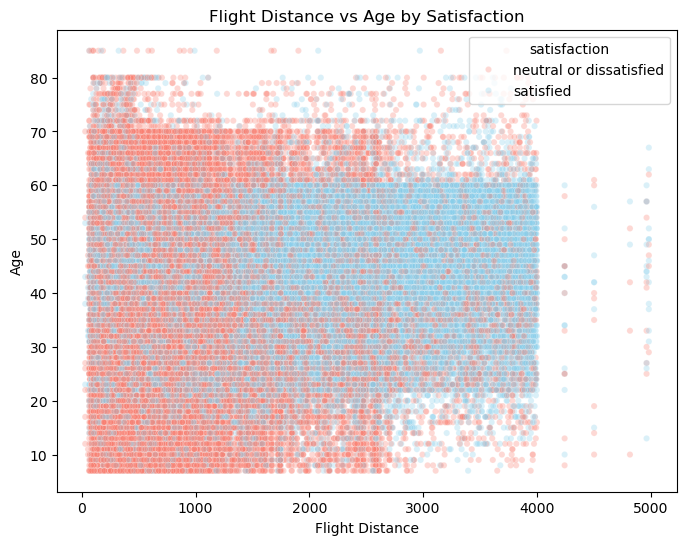

In [26]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df_airline,
    x='Flight Distance',
    y='Age',
    hue='satisfaction',
    palette={'satisfied': 'skyblue', 'neutral or dissatisfied': 'salmon'},
    alpha=0.3,          # more transparency
    s=20                # smaller points
)
plt.title('Flight Distance vs Age by Satisfaction')
plt.show()


Interpretation: A more concentation of blue points is seen for people bw age group 20-60 as compared to passengers younger and older to it

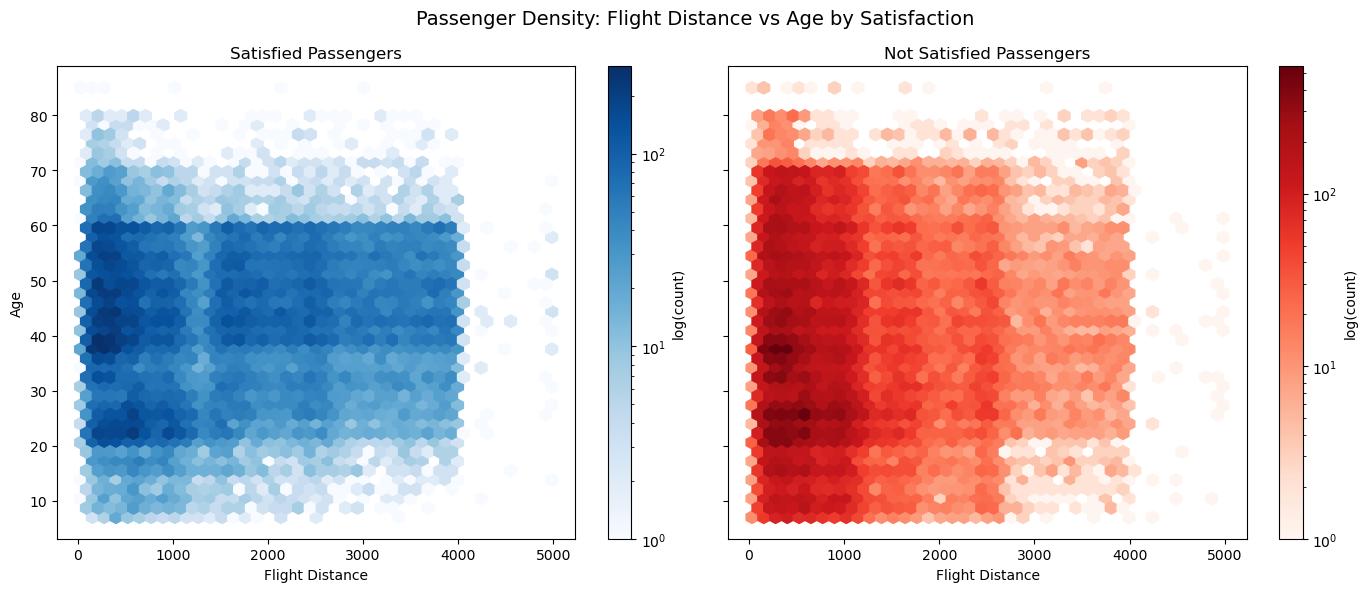

In [27]:
# Split the data
satisfied = df_airline[df_airline['satisfaction'] == 'satisfied']
not_satisfied = df_airline[df_airline['satisfaction'] == 'neutral or dissatisfied']

# Create two subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharex=True, sharey=True)

# --- Plot 1: Satisfied ---
hb1 = axes[0].hexbin(
    satisfied['Flight Distance'],
    satisfied['Age'],
    gridsize=40,
    cmap='Blues',
    bins='log'     # makes dense areas more readable
)
axes[0].set_title('Satisfied Passengers')
axes[0].set_xlabel('Flight Distance')
axes[0].set_ylabel('Age')
cb1 = fig.colorbar(hb1, ax=axes[0])
cb1.set_label('log(count)')

# --- Plot 2: Not Satisfied ---
hb2 = axes[1].hexbin(
    not_satisfied['Flight Distance'],
    not_satisfied['Age'],
    gridsize=40,
    cmap='Reds',
    bins='log'
)
axes[1].set_title('Not Satisfied Passengers')
axes[1].set_xlabel('Flight Distance')
cb2 = fig.colorbar(hb2, ax=axes[1])
cb2.set_label('log(count)')

plt.suptitle('Passenger Density: Flight Distance vs Age by Satisfaction', fontsize=14)
plt.tight_layout()
plt.show()


Interpretation: Longer flights (2000–5000 km) have a greater proportion of satisfied passengers compared to short flights, possibly due to better services or expectations met on longer trips.
Not satisfied passengers are more evenly spread, with slightly higher counts toward shorter flights (<1000 km).

There’s no clear evidence that age alone affects satisfaction, but flight distance seems to have a mild influence.

## Encoding, Standard Scaler & Train-test

In [28]:
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, OneHotEncoder

In [29]:
le_satisfaction = LabelEncoder()
df_airline['satisfaction'] = le_satisfaction.fit_transform(df_airline['satisfaction'])

In [30]:
df_airline['satisfaction']

0         0
1         0
2         1
3         0
4         1
         ..
129875    0
129876    1
129877    0
129878    1
129879    0
Name: satisfaction, Length: 129487, dtype: int32

In [31]:
df_airline.drop(['Age_Group', 'satisfaction_num', 'id'], axis=1, inplace=True)

In [32]:
df_airline.dtypes

Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness                            int64
Departure Delay in Minutes             int64
Arrival Delay in Minutes             float64
satisfacti

In [33]:
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

In [34]:
ohe_encoding = ColumnTransformer(transformers=[('tnf1', OneHotEncoder(sparse_output=False,drop='first'),
                                                ['Gender', 'Customer Type', 'Type of Travel', 'Class'])], remainder='passthrough')

In [35]:
X= df_airline.drop('satisfaction', axis=1)
y= df_airline['satisfaction']

X = X.dropna(subset=['Arrival Delay in Minutes'])
y = y[X.index]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [36]:
# Save indexes (important)
train_index = X_train.index
test_index = X_test.index

In [37]:
X_train = ohe_encoding.fit_transform(X_train)
X_test = ohe_encoding.transform(X_test)

In [38]:
X_train

array([[ 1.,  0.,  0., ...,  5.,  9.,  0.],
       [ 1.,  0.,  0., ...,  3.,  5.,  0.],
       [ 1.,  1.,  0., ...,  3.,  0.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  3.,  0.,  0.],
       [ 0.,  0.,  0., ...,  5., 33., 35.],
       [ 1.,  0.,  0., ...,  3.,  0.,  0.]])

In [39]:
# Get new column names
new_col_names = ohe_encoding.get_feature_names_out()

In [40]:
# Convert arrays → DataFrames
X_train = pd.DataFrame(X_train, columns=new_col_names, index=train_index)
X_test = pd.DataFrame(X_test, columns=new_col_names, index=test_index)

In [41]:
X_train

,tnf1__Gender_Male,tnf1__Customer Type_disloyal Customer,tnf1__Type of Travel_Personal Travel,tnf1__Class_Eco,tnf1__Class_Eco Plus,remainder__Age,remainder__Flight Distance,remainder__Inflight wifi service,remainder__Departure/Arrival time convenient,remainder__Ease of Online booking,...,remainder__Seat comfort,remainder__Inflight entertainment,remainder__On-board service,remainder__Leg room service,remainder__Baggage handling,remainder__Checkin service,remainder__Inflight service,remainder__Cleanliness,remainder__Departure Delay in Minutes,remainder__Arrival Delay in Minutes
24689,1.0,0.0,0.0,0.0,0.0,44.0,1188.0,5.0,2.0,5.0,...,4.0,2.0,2.0,2.0,2.0,3.0,2.0,5.0,9.0,0.0
21925,1.0,0.0,0.0,0.0,0.0,40.0,2432.0,3.0,3.0,3.0,...,5.0,4.0,4.0,4.0,4.0,5.0,4.0,3.0,5.0,0.0
45041,1.0,1.0,0.0,1.0,0.0,32.0,480.0,3.0,4.0,3.0,...,3.0,3.0,2.0,3.0,4.0,4.0,3.0,3.0,0.0,0.0
1420,0.0,0.0,0.0,0.0,0.0,74.0,3589.0,3.0,3.0,3.0,...,2.0,3.0,3.0,3.0,3.0,1.0,3.0,4.0,0.0,3.0
81073,1.0,0.0,1.0,1.0,0.0,68.0,528.0,3.0,4.0,3.0,...,2.0,2.0,4.0,2.0,5.0,3.0,5.0,2.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98343,1.0,0.0,0.0,0.0,0.0,36.0,3739.0,2.0,1.0,4.0,...,1.0,2.0,2.0,2.0,2.0,2.0,2.0,4.0,57.0,88.0
5205,0.0,0.0,1.0,1.0,0.0,34.0,944.0,3.0,3.0,2.0,...,3.0,3.0,3.0,4.0,4.0,4.0,3.0,3.0,85.0,72.0
77938,0.0,0.0,1.0,0.0,0.0,19.0,179.0,3.0,3.0,3.0,...,3.0,3.0,3.0,4.0,2.0,2.0,3.0,3.0,0.0,0.0
98837,0.0,0.0,0.0,0.0,0.0,46.0,3117.0,5.0,5.0,5.0,...,4.0,5.0,5.0,5.0,5.0,3.0,5.0,5.0,33.0,35.0


In [42]:
# merge data again for correlation
train_df = pd.concat([X_train, y_train], axis=1)
test_df = pd.concat([X_test,y_test], axis=1)
airline_df_encoded = pd.concat([train_df, test_df], axis=0)
#airline_df_encoded.columns = new_col_names
#airline_df_encoded.columns = new_col_names + ['satisfaction']

## Logistic Regression

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc

In [44]:
log_regg = LogisticRegression()
log_regg.fit(X_train, y_train)

C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [45]:
#Training data accuracy
accuracy = log_regg.score(X_train, y_train)
accuracy

0.7795785525154457

In [46]:
accuracy = log_regg.score(X_test, y_test)
accuracy

0.778747393621129

In [47]:
# same thing as above for classification models, just gives us y_pred to compute CM, classification report
#for regression models it give R^2 value
y_pred = log_regg.predict(X_test)
acc_score = accuracy_score(y_test,y_pred)
acc_score

0.778747393621129

In [48]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.79      0.80     21857
           1       0.74      0.76      0.75     16990

    accuracy                           0.78     38847
   macro avg       0.78      0.78      0.78     38847
weighted avg       0.78      0.78      0.78     38847



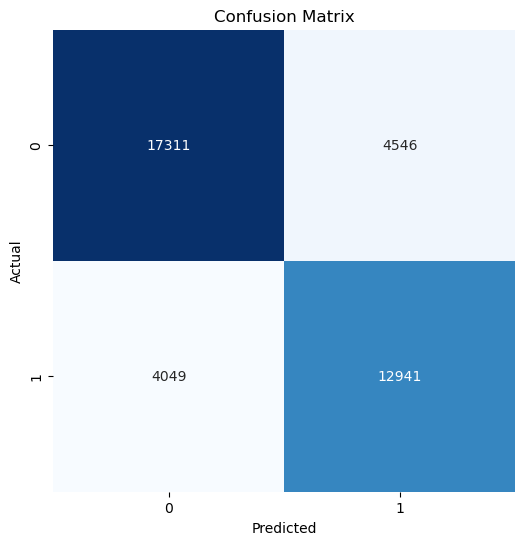

In [49]:
cm = confusion_matrix(y_test, y_pred)

#disp= ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=log_regg.classes_)
#disp.plot(cmap='Blues')

plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, square=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [50]:
y_probability = log_regg.predict_proba(X_test)[:,1]
y_probability

array([0.28621699, 0.0557375 , 0.51485235, ..., 0.40980834, 0.18251861,
       0.64764172])

In [51]:
fpr, tpr, thresholds = roc_curve(y_test, y_probability)
roc_auc = auc(fpr, tpr)

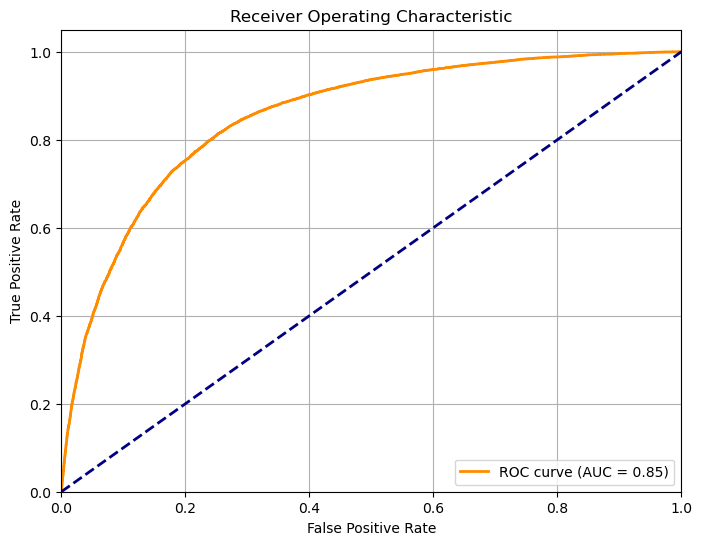

In [52]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

In [53]:
from sklearn.preprocessing import StandardScaler

In [54]:
scaling = StandardScaler()

In [55]:
X_train = scaling.fit_transform(X_train)
X_test = scaling.transform(X_test)

In [56]:
X_train

array([[ 1.01612738, -0.47378027, -0.66883878, ...,  1.30640571,
        -0.149423  , -0.39560359],
       [ 1.01612738, -0.47378027, -0.66883878, ..., -0.21569536,
        -0.25586725, -0.39560359],
       [ 1.01612738,  2.1106831 , -0.66883878, ..., -0.21569536,
        -0.38892257, -0.39560359],
       ...,
       [-0.98412858, -0.47378027,  1.49512862, ..., -0.21569536,
        -0.38892257, -0.39560359],
       [-0.98412858, -0.47378027, -0.66883878, ...,  1.30640571,
         0.48924252,  0.52338279],
       [ 1.01612738, -0.47378027, -0.66883878, ..., -0.21569536,
        -0.38892257, -0.39560359]])

In [57]:
logistic_reg = LogisticRegression()

In [58]:
logistic_reg.fit(X_train,y_train)

LogisticRegression()

In [59]:
y_pred = logistic_reg.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.90      0.89     21857
           1       0.87      0.85      0.86     16990

    accuracy                           0.88     38847
   macro avg       0.88      0.88      0.88     38847
weighted avg       0.88      0.88      0.88     38847



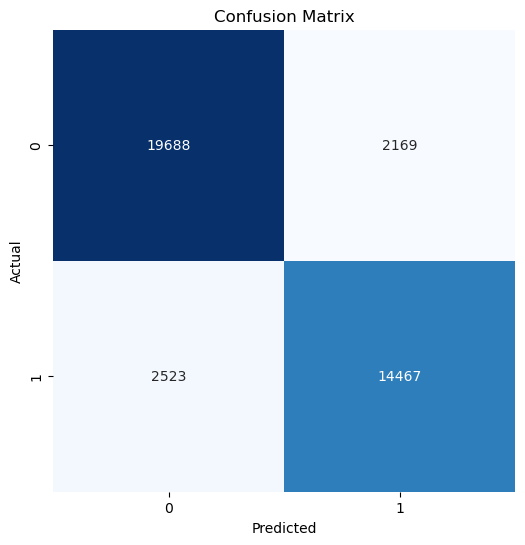

In [60]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, square=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [61]:
y_probability = logistic_reg.predict_proba(X_test)[:,1]
y_probability

array([0.51836479, 0.02010049, 0.71512323, ..., 0.00320965, 0.14984308,
       0.91654817])

In [62]:
fpr, tpr, thresholds = roc_curve(y_test, y_probability)
roc_auc = auc(fpr, tpr)

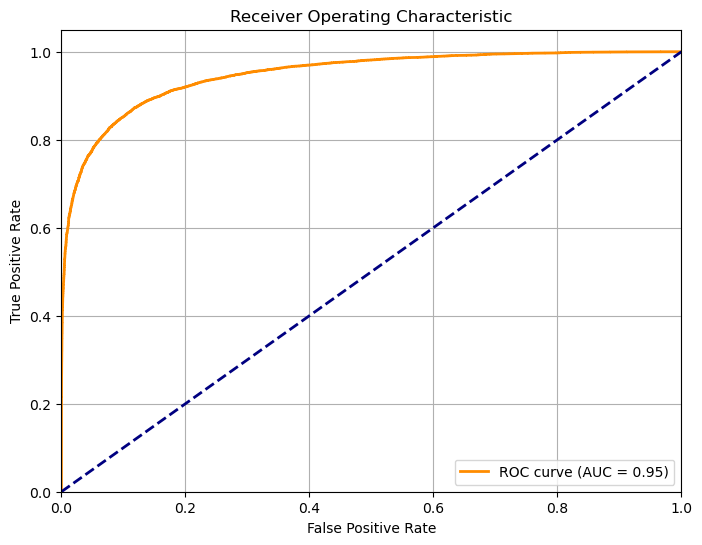

In [63]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

## Correlation

In [64]:
cor = airline_df_encoded.corr()

In [65]:
cor

,tnf1__Gender_Male,tnf1__Customer Type_disloyal Customer,tnf1__Type of Travel_Personal Travel,tnf1__Class_Eco,tnf1__Class_Eco Plus,remainder__Age,remainder__Flight Distance,remainder__Inflight wifi service,remainder__Departure/Arrival time convenient,remainder__Ease of Online booking,...,remainder__Inflight entertainment,remainder__On-board service,remainder__Leg room service,remainder__Baggage handling,remainder__Checkin service,remainder__Inflight service,remainder__Cleanliness,remainder__Departure Delay in Minutes,remainder__Arrival Delay in Minutes,satisfaction
tnf1__Gender_Male,1.000000,-0.030803,0.009215,-0.002542,-0.011531,0.008984,0.003836,0.006015,0.006224,0.006426,...,0.003806,0.006420,0.021314,0.036414,0.008368,0.038159,0.002824,0.003111,0.001309,0.011496
tnf1__Customer Type_disloyal Customer,-0.030803,1.000000,-0.308210,0.118369,-0.062072,-0.284275,-0.226134,-0.001043,-0.061713,-0.016915,...,-0.106400,-0.054104,-0.054300,0.025015,-0.031271,0.023509,-0.081615,0.004131,0.004730,-0.185925
tnf1__Type of Travel_Personal Travel,0.009215,-0.308210,1.000000,0.501048,0.102519,-0.044910,-0.267064,-0.123476,0.239473,-0.127623,...,-0.153052,-0.059788,-0.125024,-0.032921,0.016514,-0.023509,-0.084505,-0.006336,-0.005830,-0.449794
tnf1__Class_Eco,-0.002542,0.118369,0.501048,1.000000,-0.252180,-0.132824,-0.404050,-0.054258,0.113714,-0.107356,...,-0.177234,-0.184556,-0.180304,-0.138884,-0.129547,-0.134534,-0.124902,0.008889,0.012301,-0.449495
tnf1__Class_Eco Plus,-0.011531,-0.062072,0.102519,-0.252180,1.000000,-0.012762,-0.124318,0.004876,0.015475,-0.017944,...,-0.049370,-0.075704,-0.062455,-0.066325,-0.064377,-0.061818,-0.035343,0.002922,0.005173,-0.106120
remainder__Age,0.008984,-0.284275,-0.044910,-0.132824,-0.012762,1.000000,0.099863,0.011754,-0.025569,0.012877,...,0.074763,0.056852,0.053341,-0.048192,0.033190,-0.051677,0.052237,-0.009263,-0.011248,0.134001
remainder__Flight Distance,0.003836,-0.226134,-0.267064,-0.404050,-0.124318,0.099863,1.000000,0.009091,-0.084164,0.049019,...,0.130712,0.111386,0.129243,0.064810,0.073613,0.059355,0.095662,0.001992,-0.001935,0.298206
remainder__Inflight wifi service,0.006015,-0.001043,-0.123476,-0.054258,0.004876,0.011754,0.009091,1.000000,0.358979,0.671922,...,0.212706,0.124538,0.151821,0.119978,0.056478,0.109870,0.142043,-0.022512,-0.024609,0.356999
remainder__Departure/Arrival time convenient,0.006224,-0.061713,0.239473,0.113714,0.015475,-0.025569,-0.084164,0.358979,1.000000,0.501263,...,-0.038384,0.076859,-0.005366,0.078673,0.120814,0.080252,0.000424,-0.008173,-0.009433,-0.046676
remainder__Ease of Online booking,0.006426,-0.016915,-0.127623,-0.107356,-0.017944,0.012877,0.049019,0.671922,0.501263,1.000000,...,0.032276,0.033578,0.082084,0.026512,0.019848,0.025791,0.014710,-0.011546,-0.013471,0.234154


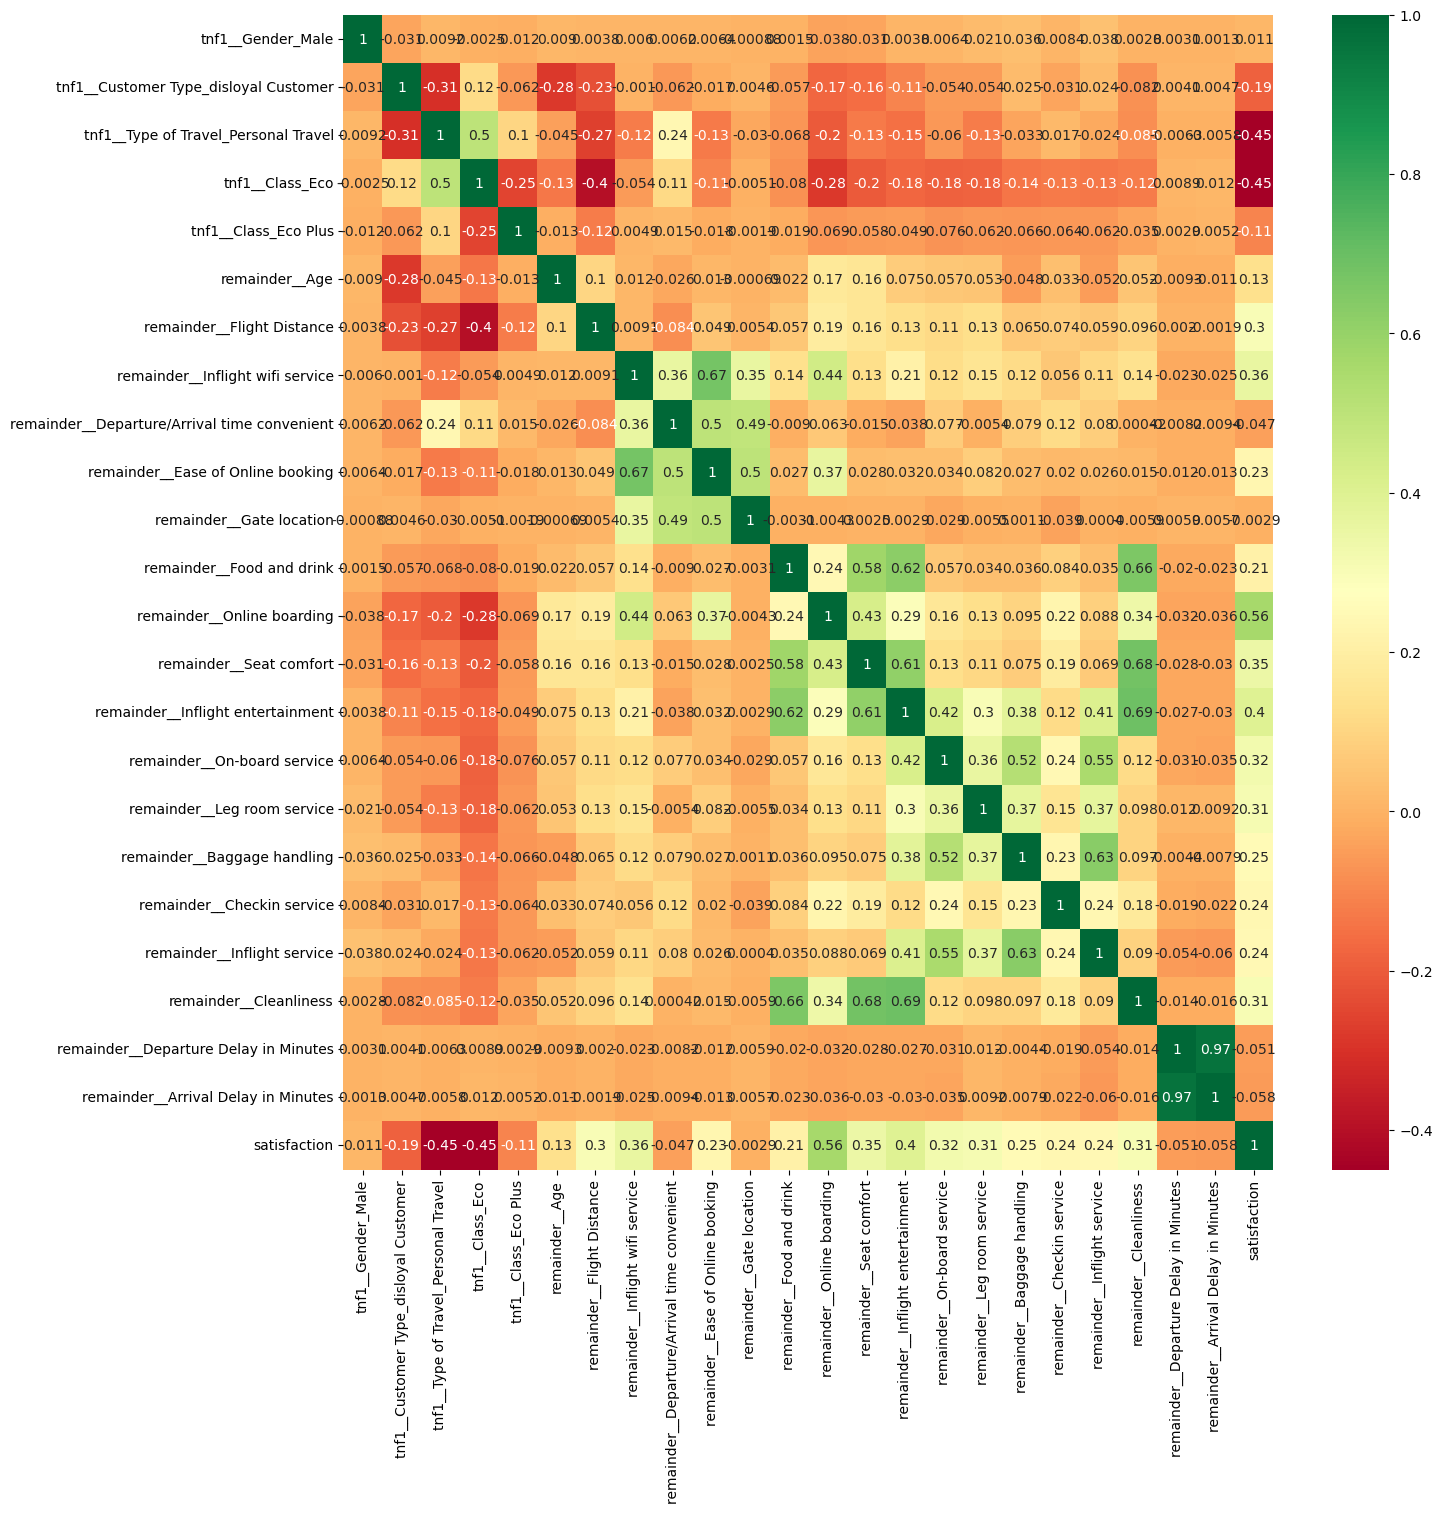

In [66]:
plt.figure(figsize=(15,15))
p = sns.heatmap(airline_df_encoded.corr(), annot=True,cmap ='RdYlGn')

Important: The above corelation heatmap clearly shows that personal traveller and class:eco columns are negatively related to Leg room service, Seat comfort and flight distance. This makes sense because economy passengers typically experience smaller seat space and less legroom. Moreover, Personal travelers tend to be more emotionally sensitive to these limitations as they Pay out-of-pocket and therefore have higher expectations for value. Their travel is often leisure-related, so discomfort has a stronger impact on perceived satisfaction.

All these reasons are enough for both "Type of travel" and "Class Eco" features show strong negative correlations with the Satisfaction column. They represent groups that experience lower comfort and higher emotional sensitivity, making them more likely to report dissatisfaction.

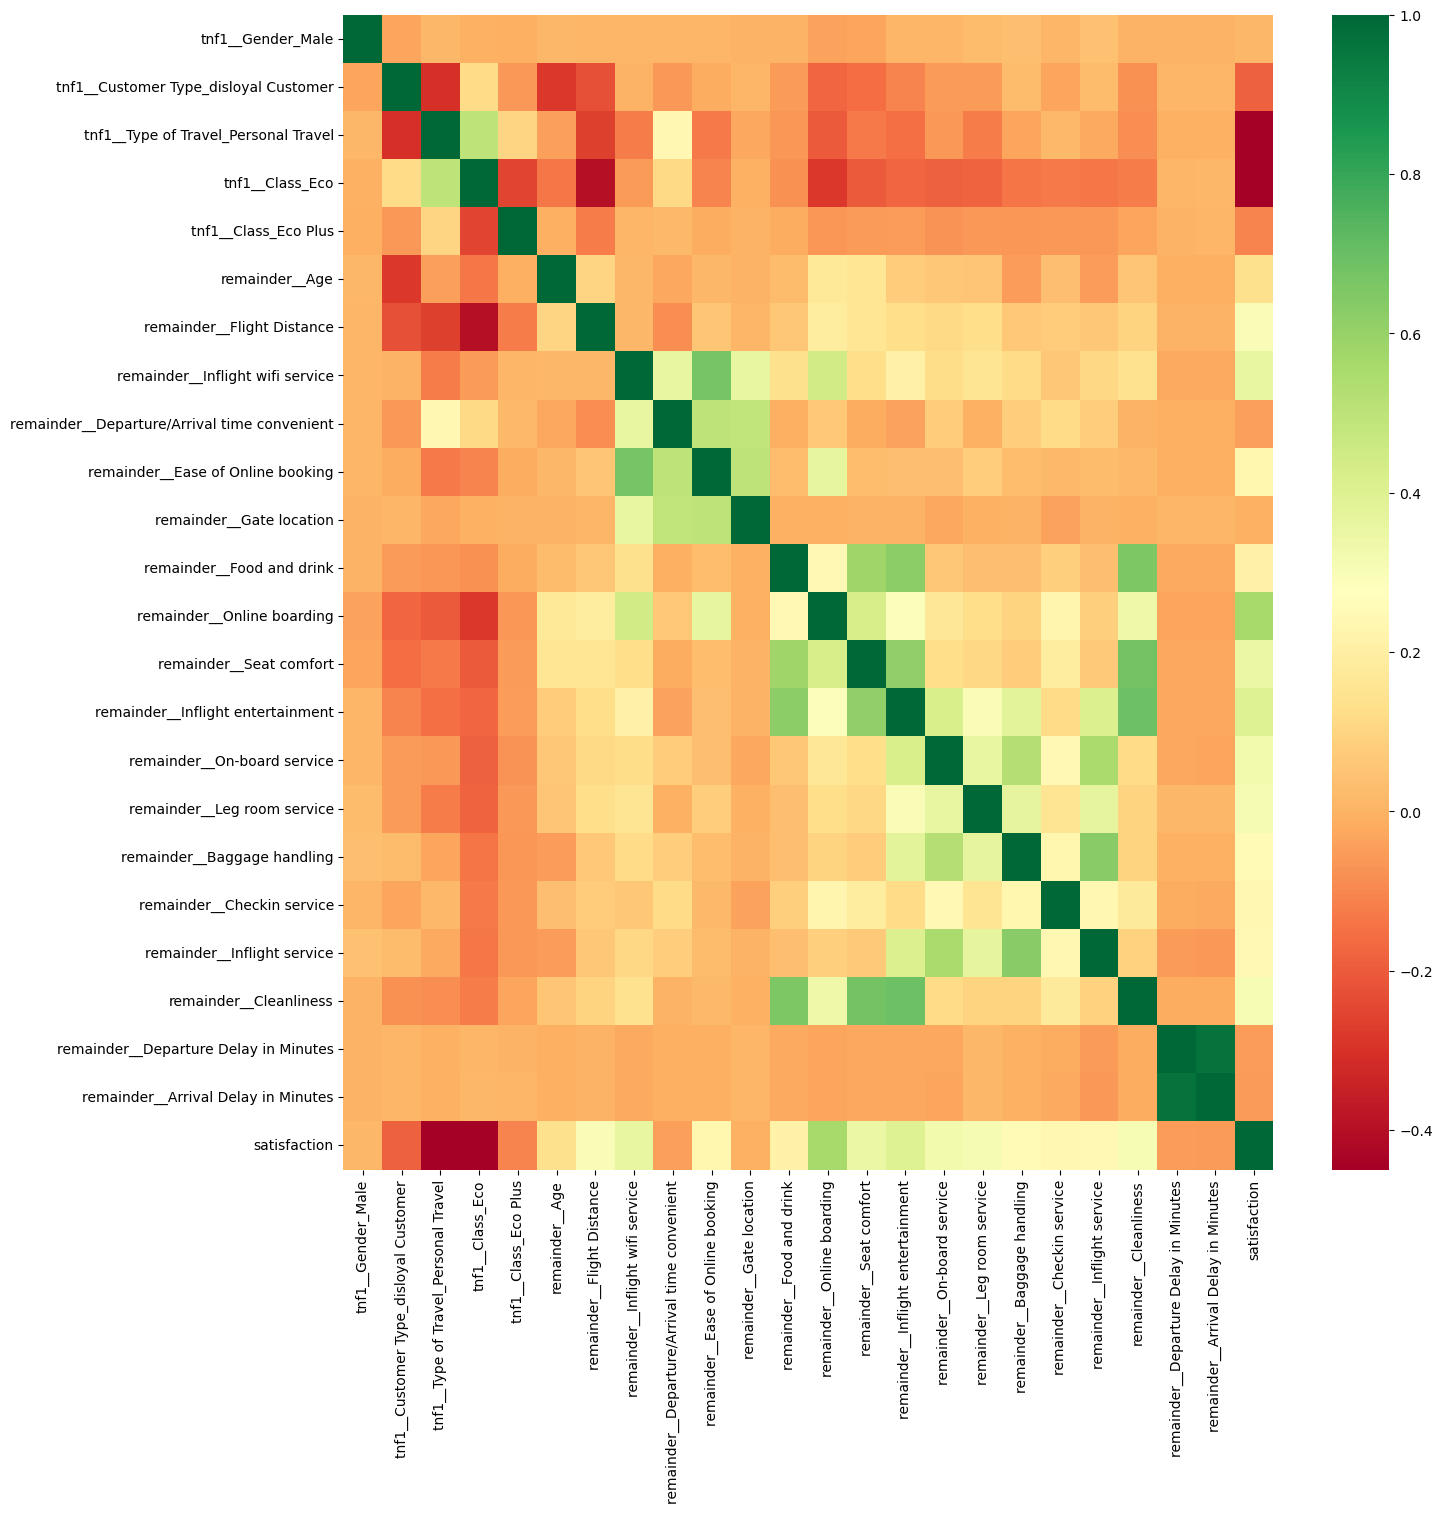

In [67]:
plt.figure(figsize=(15,15))
sns.heatmap(airline_df_encoded.corr(), annot=False, cmap='RdYlGn')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()


In [68]:
corr = airline_df_encoded.corr()['satisfaction'].sort_values()

top10_negative = corr.head(10)
top10_positive = corr.tail(10).sort_values(ascending=False)

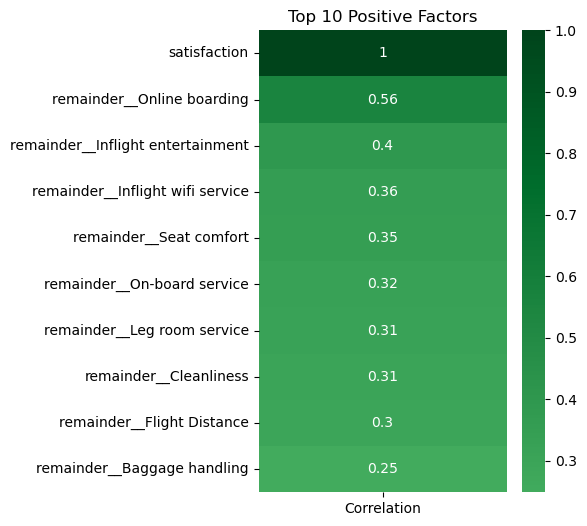

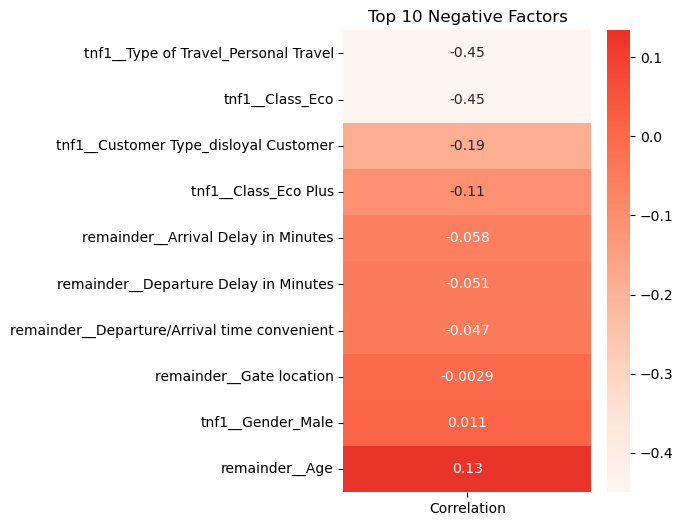

In [69]:
# Heatmap for positive correlations
plt.figure(figsize=(4, 6))
sns.heatmap(top10_positive.to_frame('Correlation'), annot=True, cmap='Greens', center=0)
plt.title('Top 10 Positive Factors')
plt.show()

# Heatmap for negative correlations
plt.figure(figsize=(4, 6))
sns.heatmap(top10_negative.to_frame('Correlation'), annot=True, cmap='Reds', center=0)
plt.title('Top 10 Negative Factors')
plt.show()

In [70]:
X_test

array([[-0.98412858, -0.47378027, -0.66883878, ..., -0.97674589,
        -0.38892257, -0.39560359],
       [ 1.01612738, -0.47378027,  1.49512862, ..., -0.97674589,
        -0.38892257, -0.39560359],
       [ 1.01612738, -0.47378027,  1.49512862, ...,  1.30640571,
         3.07051564,  3.28034194],
       ...,
       [-0.98412858, -0.47378027,  1.49512862, ..., -0.21569536,
        -0.38892257, -0.39560359],
       [ 1.01612738, -0.47378027,  1.49512862, ...,  0.54535517,
        -0.38892257, -0.21180632],
       [ 1.01612738, -0.47378027, -0.66883878, ..., -0.21569536,
        -0.25586725, -0.29057658]])

## Evaluating other Models

In [71]:
def classification(model_name):
    model_name.fit(X_train, y_train)

    # Predict the labels for the training data
    y_pred_train = model_name.predict(X_train)
    accuracy_train = accuracy_score(y_train, y_pred_train)
    
    y_pred = model_name.predict(X_test)
    accuracy_test = accuracy_score(y_test, y_pred)

    precision = precision_score(y_test, y_pred, zero_division=0)
    recall = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)

    y_prob = model_name.predict_proba(X_test)[:,1]
    roc_auc = roc_auc_score(y_test, y_prob)

    #Create a metrics DataFrame
    df_metrics = pd.DataFrame({
        'Training Accuracy': [accuracy_train],
        'Test Accuracy': [accuracy_test],
        'Precision': [precision],
        'Recall': [recall],
        'F1-Score': [f1],
        'ROC AUC': [roc_auc]
    })

    # convert values to percentages
    for col in ['Training Accuracy',
                'Test Accuracy',
                'Precision',
                'Recall',
                'F1-Score',
                'ROC AUC']:
        df_metrics[col] = df_metrics[col].map(lambda x: f'{x:.2%}')

    # Print the DataFrame
    #print(df_metrics)

    cm = confusion_matrix(y_test, y_pred, labels=[0, 1])
    
    # Normalize by total number
    cm = cm / np.sum(cm)

    
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, 
                cmap="Blues", 
                fmt='.2%', 
                xticklabels=['No', 'Yes'], 
                yticklabels=['No', 'Yes'])
    plt.title('Confusion Matrix (%)')
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    #print(X_train)
    
    return df_metrics

In [72]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
)
from xgboost import XGBClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
)

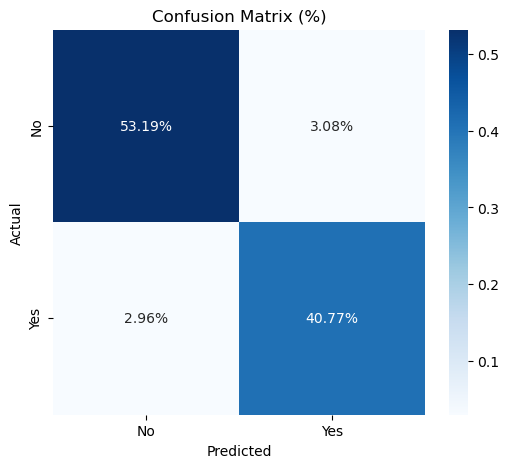

,Training Accuracy,Test Accuracy,Precision,Recall,F1-Score,ROC AUC
0,100.00%,93.96%,92.98%,93.23%,93.10%,93.88%


In [73]:
dt_clf = DecisionTreeClassifier(random_state=52)
classification(dt_clf)

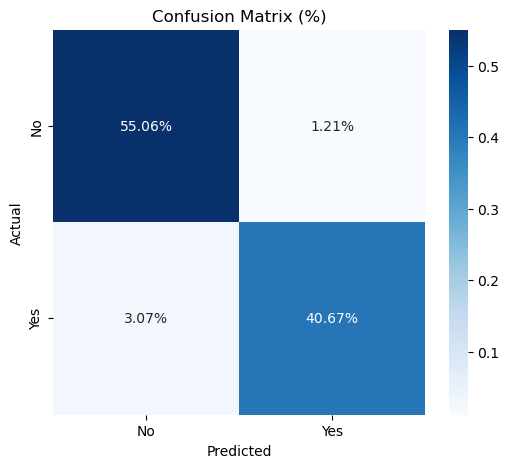

,Training Accuracy,Test Accuracy,Precision,Recall,F1-Score,ROC AUC
0,100.00%,95.73%,97.12%,92.99%,95.01%,99.18%


In [74]:
rnf_clf = RandomForestClassifier(random_state=52)
classification(rnf_clf)

C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


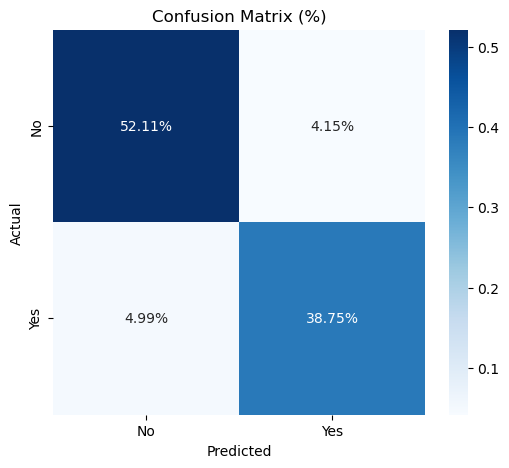

,Training Accuracy,Test Accuracy,Precision,Recall,F1-Score,ROC AUC
0,91.05%,90.86%,90.32%,88.60%,89.45%,96.85%


In [75]:
adab_clf = AdaBoostClassifier(random_state=52)
classification(adab_clf)

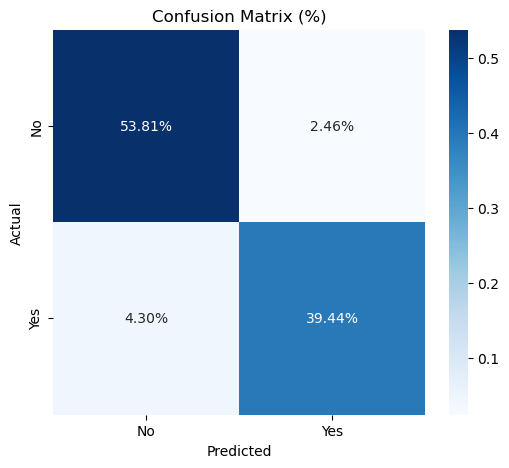

,Training Accuracy,Test Accuracy,Precision,Recall,F1-Score,ROC AUC
0,93.38%,93.25%,94.13%,90.18%,92.11%,98.29%


In [76]:
grtb_clf = GradientBoostingClassifier(random_state=52)
classification(grtb_clf)

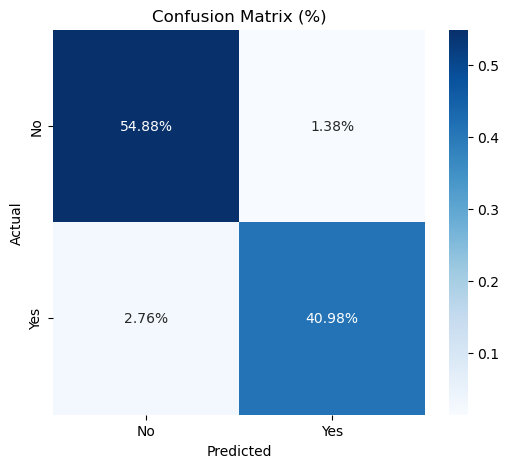

,Training Accuracy,Test Accuracy,Precision,Recall,F1-Score,ROC AUC
0,97.50%,95.86%,96.74%,93.70%,95.20%,99.38%


In [77]:
xgb_clf = XGBClassifier(random_state=52)
classification(xgb_clf)

## Cross Validation

In [78]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.pipeline import Pipeline

In [79]:
# def classification_cv(model, cv_splits=5):

    
#     # Define scoring metrics
#     scoring = {
#         'accuracy': make_scorer(accuracy_score),
#         'precision': make_scorer(precision_score, zero_division=0),
#         'recall': make_scorer(recall_score, zero_division=0),
#         'f1': make_scorer(f1_score, zero_division=0),
#         'roc_auc': 'roc_auc'
#     }
    
#     # Create stratified K-Fold cross-validator
#     cv = StratifiedKFold(n_splits=cv_splits, shuffle=True, random_state=42)

#     # Run cross-validation
#     cv_results = cross_validate(model, X, y, cv=cv, scoring=scoring, return_train_score=True)

#     # Collect average metrics
#     df_metrics = pd.DataFrame({
#         'Training Accuracy': [cv_results['train_accuracy'].mean()],
#         'Test Accuracy': [cv_results['test_accuracy'].mean()],
#         'Precision': [cv_results['test_precision'].mean()],
#         'Recall': [cv_results['test_recall'].mean()],
#         'F1-Score': [cv_results['test_f1'].mean()],
#         'ROC AUC': [cv_results['test_roc_auc'].mean()]
#     })

#     # Convert values to percentages
#     for col in df_metrics.columns:
#         df_metrics[col] = df_metrics[col].map(lambda x: f'{x:.2%}')
    
#     #print(df_metrics)

#     return df_metrics

In [80]:
def classification_cv(model, X, y, categorical_features=None, numeric_features=None, cv_splits=5):
    
    # Create ColumnTransformer 
    transformers = []
    if categorical_features:
        transformers.append(
            ('ohe', OneHotEncoder(sparse_output=False, drop='first'), categorical_features)
        )
    if numeric_features:
        transformers.append(
            ('scaler', StandardScaler(), numeric_features)
        )
    
    if transformers:
        preprocessor = ColumnTransformer(transformers=transformers, remainder='passthrough')
        pipe = Pipeline([
            ('preprocess', preprocessor),
            ('clf', model)
        ])
    else:
        # No preprocessing needed
        pipe = model

    # Define scoring metrics
    scoring = {
        'accuracy': make_scorer(accuracy_score),
        'precision': make_scorer(precision_score, zero_division=0),
        'recall': make_scorer(recall_score, zero_division=0),
        'f1': make_scorer(f1_score, zero_division=0),
        'roc_auc': 'roc_auc'
    }

    # Stratified K-Fold CV
    cv = StratifiedKFold(n_splits=cv_splits, shuffle=True, random_state=42)

    # Run cross-validation
    cv_results = cross_validate(pipe, X, y, cv=cv, scoring=scoring, return_train_score=True)

    # Collect average metrics
    df_metrics = pd.DataFrame({
        'Training Accuracy': [cv_results['train_accuracy'].mean()],
        'Test Accuracy': [cv_results['test_accuracy'].mean()],
        'Precision': [cv_results['test_precision'].mean()],
        'Recall': [cv_results['test_recall'].mean()],
        'F1-Score': [cv_results['test_f1'].mean()],
        'ROC AUC': [cv_results['test_roc_auc'].mean()]
    })

    # Convert to percentages
    for col in df_metrics.columns:
        df_metrics[col] = df_metrics[col].map(lambda x: f'{x:.2%}')

    print(df_metrics)
    
    return df_metrics

In [81]:
categorical_features = ['Gender', 'Customer Type', 'Type of Travel', 'Class']
numeric_features = ['Age', 'Flight Distance', 'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']

In [82]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree':DecisionTreeClassifier(random_state=52),
    'Random Forest':  RandomForestClassifier(random_state=52),
    'gradient boost': GradientBoostingClassifier(random_state=52),
    'adaboost':  AdaBoostClassifier(random_state=52),
    'XGBoost': XGBClassifier(eval_metric='logloss')
}

results={}

for name, model in models.items():
    print(f"\nEvaluating {name}")
    df_metrics = classification_cv(model, X, y, categorical_features=categorical_features, numeric_features=numeric_features, cv_splits=5)
    results[name] = df_metrics
    


Evaluating Logistic Regression
  Training Accuracy Test Accuracy Precision  Recall F1-Score ROC AUC
0            88.12%        88.11%    87.00%  85.38%   86.19%  94.88%

Evaluating Decision Tree
  Training Accuracy Test Accuracy Precision  Recall F1-Score ROC AUC
0           100.00%        93.87%    92.78%  93.13%   92.96%  93.78%

Evaluating Random Forest
  Training Accuracy Test Accuracy Precision  Recall F1-Score ROC AUC
0           100.00%        95.74%    97.01%  93.07%   95.00%  99.20%

Evaluating gradient boost
  Training Accuracy Test Accuracy Precision  Recall F1-Score ROC AUC
0            93.40%        93.34%    94.21%  90.22%   92.17%  98.30%

Evaluating adaboost


C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Dell\an

  Training Accuracy Test Accuracy Precision  Recall F1-Score ROC AUC
0            91.12%        91.08%    90.64%  88.63%   89.62%  96.90%

Evaluating XGBoost
  Training Accuracy Test Accuracy Precision  Recall F1-Score ROC AUC
0            97.33%        95.98%    96.86%  93.79%   95.30%  99.40%


In [ ]:
models = {
    'Logistic Regression': LogisticRegression(penalty='l2', C=0.1, max_iter=1000, random_state=52),
    'Decision Tree': DecisionTreeClassifier(max_depth=8, min_samples_split=20, min_samples_leaf=10, random_state=52),
    'Random Forest': RandomForestClassifier(n_estimators=200, max_depth=10, min_samples_split=20, min_samples_leaf=10, max_features='sqrt', random_state=52),
    'Gradient Boost': GradientBoostingClassifier(n_estimators=200, learning_rate=0.05, max_depth=3, min_samples_leaf=5, random_state=52),
    'AdaBoost': AdaBoostClassifier(n_estimators=200, learning_rate=0.5, random_state=52),
    'XGBoost': XGBClassifier(n_estimators=300, learning_rate=0.05, max_depth=4, subsample=0.8, colsample_bytree=0.8, reg_lambda=1.0, reg_alpha=0.5, eval_metric='logloss', random_state=52)
}

results={}

for name, model in models.items():
    print(f"\nEvaluating {name}")
    df_metrics = classification_cv(model, X, y, categorical_features=categorical_features, numeric_features=numeric_features, cv_splits=5)
    results[name] = df_metrics


Evaluating Logistic Regression
  Training Accuracy Test Accuracy Precision  Recall F1-Score ROC AUC
0            88.12%        88.10%    87.00%  85.37%   86.18%  94.88%

Evaluating Decision Tree
  Training Accuracy Test Accuracy Precision  Recall F1-Score ROC AUC
0            92.94%        92.72%    92.79%  90.25%   91.50%  97.85%

Evaluating Random Forest


In [ ]:
# Fit and transform X
X_encoded = ohe_encoding.fit_transform(X)

# Get feature names after encoding
encoded_feature_names = ohe_encoding.get_feature_names_out()

# Train AdaBoost model
adaboost = AdaBoostClassifier(n_estimators=200, learning_rate=0.5, random_state=52)
adaboost.fit(X_encoded, y)

# Get feature importances
importances = adaboost.feature_importances_

# Create DataFrame
feature_importance_df = pd.DataFrame({
    'Feature': encoded_feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Show top features
#print(feature_importance_df.head(10))

# Plot top 15 features
plt.figure(figsize=(10,6))
sns.barplot(data=feature_importance_df, x='Importance', y='Feature', palette='viridis')
plt.title('Top Feature Importances - Random Forest', fontsize=14)
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()
